In [ ]:
!wget --no-check-certificate -O hotel.csv 'https://docs.google.com/uc?export=download&id=1tpiEhbEQgSAQQU-SJ_I5XymGYkfeVptr'

--2021-03-18 14:54:27--  https://docs.google.com/uc?export=download&id=1tpiEhbEQgSAQQU-SJ_I5XymGYkfeVptr
Resolving docs.google.com (docs.google.com)... 74.125.137.101, 74.125.137.139, 74.125.137.100, ...
Connecting to docs.google.com (docs.google.com)|74.125.137.101|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0o-8s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/f7ef011mael9170smp29ghnnkqcqi3p4/1616079225000/02898390244786671904/*/1tpiEhbEQgSAQQU-SJ_I5XymGYkfeVptr?e=download [following]
--2021-03-18 14:54:28--  https://doc-0o-8s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/f7ef011mael9170smp29ghnnkqcqi3p4/1616079225000/02898390244786671904/*/1tpiEhbEQgSAQQU-SJ_I5XymGYkfeVptr?e=download
Resolving doc-0o-8s-docs.googleusercontent.com (doc-0o-8s-docs.googleusercontent.com)... 216.58.192.97, 2607:f8b0:4026:803::2001
Connecting to doc-0o-8s-docs.googleusercontent.com (doc-0o-8s-

In [ ]:
import pandas as pd
import numpy as np
import scipy
from scipy.stats import zscore
from scipy import stats
import matplotlib

In [ ]:
data =pd.read_csv("/content/hotel.csv")
data.shape
data


,hotel,is_canceled,lead_time,adults,children,babies,meal,deposit_type,agent,company
0,Resort Hotel,0,342,2,0.0,0,BB,No Deposit,NaN,NaN
1,Resort Hotel,0,737,2,0.0,0,BB,No Deposit,NaN,NaN
2,Resort Hotel,0,7,1,0.0,0,BB,No Deposit,NaN,NaN
3,Resort Hotel,0,13,1,0.0,0,BB,No Deposit,304.0,NaN
4,Resort Hotel,0,14,2,0.0,0,BB,No Deposit,240.0,NaN
...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2,0.0,0,BB,No Deposit,394.0,NaN
119386,City Hotel,0,102,3,0.0,0,BB,No Deposit,9.0,NaN
119387,City Hotel,0,34,2,0.0,0,BB,No Deposit,9.0,NaN
119388,City Hotel,0,109,2,0.0,0,BB,No Deposit,89.0,NaN


ข้อ 1 

In [ ]:
t = data.select_dtypes(include=['int64','float64'])
t


,lead_time,adults,agent
0,342,2,NaN
1,737,2,NaN
2,7,1,NaN
3,13,1,304.0
4,14,2,240.0
...,...,...,...
119385,23,2,394.0
119386,102,3,9.0
119387,34,2,9.0
119388,109,2,89.0


ข้อ 2

In [ ]:
t.isnull()

,is_canceled,lead_time,adults,children,babies,agent,company
0,False,False,False,False,False,True,True
1,False,False,False,False,False,True,True
2,False,False,False,False,False,True,True
3,False,False,False,False,False,False,True
4,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...
119385,False,False,False,False,False,False,True
119386,False,False,False,False,False,False,True
119387,False,False,False,False,False,False,True
119388,False,False,False,False,False,False,True


In [ ]:
data = data.loc[:, data.isin([' ','NULL',0,np.nan]).mean() < .5]
data

,hotel,lead_time,adults,meal,deposit_type,agent
0,Resort Hotel,342,2,BB,No Deposit,NaN
1,Resort Hotel,737,2,BB,No Deposit,NaN
2,Resort Hotel,7,1,BB,No Deposit,NaN
3,Resort Hotel,13,1,BB,No Deposit,304.0
4,Resort Hotel,14,2,BB,No Deposit,240.0
...,...,...,...,...,...,...
119385,City Hotel,23,2,BB,No Deposit,394.0
119386,City Hotel,102,3,BB,No Deposit,9.0
119387,City Hotel,34,2,BB,No Deposit,9.0
119388,City Hotel,109,2,BB,No Deposit,89.0


ข้อ 3

In [ ]:
l = data[["agent"]]
l

,agent
0,NaN
1,NaN
2,NaN
3,304.0
4,240.0
...,...
119385,394.0
119386,9.0
119387,9.0
119388,89.0


In [ ]:
l.quantile()

agent    14.0
Name: 0.5, dtype: float64

ข้อ 4

In [ ]:
l.mask(l.sub(l.mean()).div(l.std()).abs().gt(2)) ## ทําการเปลี่ยน outliers เป็น nan ก่อน
s = l.fillna(1000)
s


,agent
0,1000.0
1,1000.0
2,1000.0
3,304.0
4,240.0
...,...
119385,394.0
119386,9.0
119387,9.0
119388,89.0


In [ ]:
l.isna().sum()

agent    16340
dtype: int64

In [ ]:
x = data[['lead_time']]
x

,lead_time
0,342
1,737
2,7
3,13
4,14
...,...
119385,23
119386,102
119387,34
119388,109


In [ ]:
check = x[x['lead_time']==0]
print(check.shape)

(6345, 1)


In [ ]:
final = x.replace(to_replace=0,value=x.mean)
checkf =final[final['lead_time']==0]

In [ ]:
print(checkf.shape)

(0, 1)


ข้อ 5 

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib

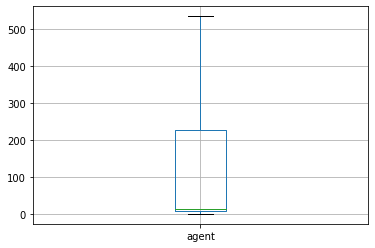

In [ ]:
l.boxplot()

In [ ]:
l.describe()

,agent
count,103050.000000
mean,86.693382
std,110.774548
min,1.000000
25%,9.000000
50%,14.000000
75%,229.000000
max,535.000000


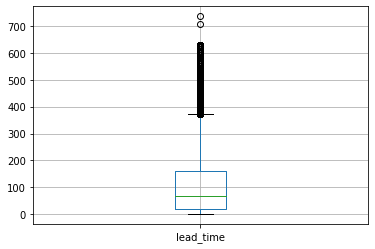

In [ ]:
x.boxplot()

In [ ]:
x.describe()

,lead_time
count,119390.000000
mean,104.011416
std,106.863097
min,0.000000
25%,18.000000
50%,69.000000
75%,160.000000
max,737.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0772d91250>]],
      dtype=object)

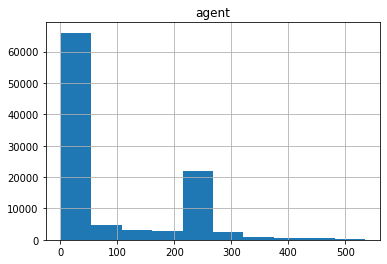

In [ ]:

l.hist()